In questo *notebook* andremo a toccare con mano l'effetto di alcune correlazioni su delle immagini.

I *notebook* sono composti di celle eseguibili contenenti codice oppure testo. Possiamo eseguire una cella premendo `Ctrl + Invio` oppure `Maiusc + Invio`.

La prima cosa che facciamo quando eseguiamo del codice Python è importare le ***librerie*** necessarie per poter lanciare il codice.

Qui ne utilizzeremo tre:

* numpy -> per rappresentare in maniera agevole in formato griglia i filtri per correlazioni e convoluzioni
* matplotlib (plt) -> per poter visualizzare le immagini
* openCV (cv2) -> per poter eseguire le elaborazioni grafiche come correlazione e convoluzione

In [ ]:
# Eseguire questa cella solo se si sta lavorando su Google Colab!

!pip install numpy matplotlib opencv-python

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

Iniziamo aprendo l'immagine utilizzando la libreria `cv2`. I filtri sono pensati per elaborare immagini in bianco e nero, quindi carichiamo l'immagine in scala di grigi.

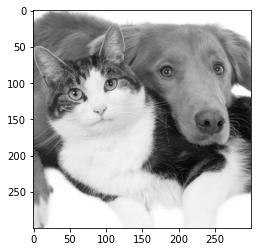

In [8]:
nome_immagine = "canegatto"
immagine = cv2.imread(f"immagini/{nome_immagine}.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(immagine, cmap="gray")

Ora siamo pronti a definire un filtro. Ad esempio, il filtro medio ha un kernel costante la cui somma degli elementi somma ad 1.

$\text{kernel filtro medio} = \left[ \begin{matrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \end{matrix} \right] = \left[ \begin{matrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{matrix} \right] \cdot \frac{1}{9}$

Possiamo rappresentare in maniera intuitiva questo kernel usando la *struttura* `array` di `numpy`.

In [9]:
kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) * 1/9

kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

Il codice indicato qui sotto definisce una convoluzione o una correlazione. Andremo ad utilizzare la funzione qui sotto definita per elaborare l'immagine.

In [11]:
def normalize_image(image_float):
    img_min = image_float.min()
    img_max = image_float.max()
    return ((image_float - img_min) * (255 / img_max)).astype("uint8")

def correlazione(immagine, kernel):
    img_filtered = cv2.filter2D(immagine.copy(), cv2.CV_64F, kernel)
    img_filtered = normalize_image(img_filtered)
    return img_filtered

def convoluzione(immagine, kernel):
    return correlazione(immagine, cv2.flip(kernel, flipCode=-1))

Applichiamo la correlazione all'immagine con il filtro medio sopra definito e visualizziamo l'immagine:

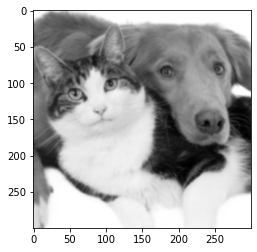

In [22]:
img_correlata = correlazione(immagine, kernel)
plt.imshow(img_correlata, cmap="gray")

Vediamo che l'immagine ha perso un po' di dettaglio. Tuttavia, possiamo anche provare ad aumentare la grandezza del kernel, andando a ottenere un'immagine ancora più "sfocata".

In [23]:
kernel = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
]) * 1/25

kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

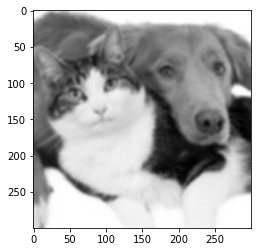

In [24]:
img_correlata = correlazione(immagine, kernel)
plt.imshow(img_correlata, cmap="gray")

Vi sono certi filtri (detti *non parametrici*) che non possono essere rappresentati con un kernel fisso. Uno di questi è il filtro **mediano**.

Possiamo usare una funzione specifica di `cv2` per applicare il filtro mediano.

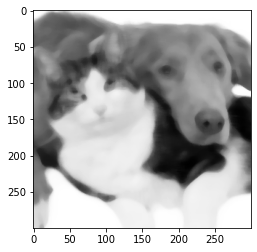

In [29]:
immagine_filtrata = cv2.medianBlur(immagine.copy(), ksize=9)
plt.imshow(immagine_filtrata, cmap="gray")

Ora è il tuo turno! Prova a "giocare" con i valori del filtro qui sotto per ottenere effetti particolari.

Ricorda:
* tieni un numero di righe pari al numero di colonne
* tieni un numero di righe dispari

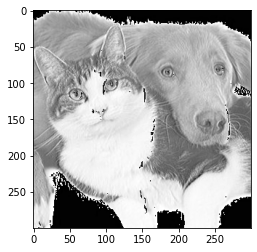

In [39]:
kernel = np.array([
    [3, 0, -1],
    [5, 0, -2],
    [0, 0, -1]
])

img_correlata = correlazione(immagine, kernel)
plt.imshow(img_correlata, cmap="gray")